In [51]:
from utils import *
from model import VAE
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
model_path = "baseline_models/fc/model.pt"
params_path = "baseline_models/fc/params.json"

In [5]:
params = Params(params_path)
vae = VAE(params.patch_len, params.alphabet_size, params.n_latent, params.arch)
vae.load_state_dict(torch.load(model_path))
vae.eval()

VAE(
  (encoder): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=16, out_features=500, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=500, out_features=500, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=500, out_features=500, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.3, inplace=False)
    (10): Linear(in_features=500, out_features=1600, bias=True)
  )
  (decoder): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Unflatten(dim=1, unflattened_size=(1, 1600))
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1600, out_features=500, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=500, out_features=500, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=500, out_features=500, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.1, inplace=False)

In [62]:
enc = torch.zeros(params.n_latent, dtype=torch.int64)     # test one ts encoding
z = torch.unsqueeze(F.one_hot(enc, num_classes=params.alphabet_size), 0)
# z.shape: [1, 100, 16]
output_1 = vae.decoder(z.float())

In [63]:
enc = torch.zeros(params.n_latent, dtype=torch.int64)     # test one ts encoding
enc[0] = 2
z = torch.unsqueeze(F.one_hot(enc, num_classes=params.alphabet_size), 0)
# z.shape: [1, 100, 16]
output_2 = vae.decoder(z.float())


In [64]:
enc = torch.zeros(params.n_latent, dtype=torch.int64)     # test one ts encoding
enc[0] = 3
z = torch.unsqueeze(F.one_hot(enc, num_classes=params.alphabet_size), 0)
# z.shape: [1, 100, 16]
output_3 = vae.decoder(z.float())


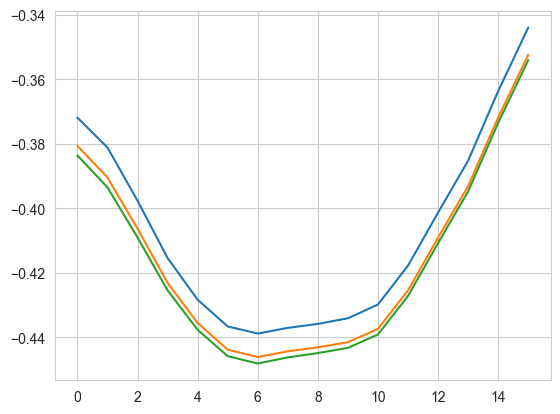

In [66]:
plt.plot(output_1.detach().numpy().squeeze())
plt.plot(output_2.detach().numpy().squeeze())
plt.plot(output_3.detach().numpy().squeeze())
